In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [243]:
class Perceptron:
    def __init__(self, learning_rate=0.01, learning_iterations=100, random_state=3):
        self.learning_rate = learning_rate
        self.learning_iterations = learning_iterations
        self.random_state = random_state
        self.errors = []
        self.weights = np.array([])

    def predict(self, input_data):
        return np.where((np.dot(input_data, self.weights[1:]) + self.weights[0]) >= 0.0, 1, -1)

    def train_perceptron(self, inputs, targets):
        rgen = np.random.RandomState(self.random_state)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=inputs.shape[1] + 1)

        for _ in range(self.learning_iterations):
            n_error = 0
            for input_i, target_i in zip(inputs, targets):
                delta_w = self.learning_rate * (target_i - self.predict(input_i))
                self.weights[0] += delta_w

                for i in range(1, len(self.weights)):
                    self.weights[i] += delta_w * input_i[i - 1]

                if delta_w != 0.0:
                    n_error += 1
            self.errors.append(n_error)
        return self

In [244]:
class Network:
    def __init__(self, eta=0.05, n_iter=10, random_state=1):
        self.perceptrons = []
        self.predicted = []
        for i in range(10):
            self.perceptrons.append(Perceptron(eta, n_iter, random_state))

    def fit(self, X, Y):
        for i in range(10):
            self.perceptrons[i].train_perceptron(X, Y[i])

    def errors(self):
        total_errors = np.zeros(len(self.perceptrons[0].errors), dtype=int)

        for i in range(10):
            total_errors += np.array(self.perceptrons[i].errors)

        print(total_errors)

        plt.plot(range(1, len(total_errors) + 1), total_errors, marker='x')

        plt.title('errors per learning iteration')
        plt.xlabel('learning iterations')
        plt.ylabel('errors')

        plt.show()

    def show(self, X):
        fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(5.25, 3))

        for i in range(2):
            for j in range(5):

                letter = X[i * 5 + j]

                for y in range(7):
                    for x in range(5):
                        if letter[y * 5 + x] == 1:
                            ax[i, j].scatter(x, y, marker='s', s=90)

                ax[i, j].invert_yaxis()
                ax[i, j].set_xticklabels([])
                ax[i, j].set_yticklabels([])

        plt.show()

    def predict(self, X):
        if len(self.predicted) == 0:
            for i in range(len(self.perceptrons)):
                self.predicted.append(self.perceptrons[i].predict(X))
        else:
            for i in range(len(self.perceptrons)):
                self.predicted[i] = self.perceptrons[i].predict(X)


    def misclassified(self, Y):
        print("misclassified examples: %d" % (np.array(self.predicted) != Y).sum())


In [245]:
def damage(X, percent, seed=1):
    rgen = np.random.RandomState(seed)
    result = np.array(X)
    count = int(X.shape[1] * percent / 100)

    for index_example in range(len(X)):
        order = np.sort(rgen.choice(X.shape[1], count, replace=False))
        for index_pixel in order:
            result[index_example][index_pixel] *= -1

    return result

In [246]:
df = pd.read_csv('data.csv', header=None)

In [247]:
X = df.iloc[[5, 10, 11, 12, 14, 16, 17, 19, 22, 24], 0:35].values
Y = df.iloc[0:10, 35:45].values

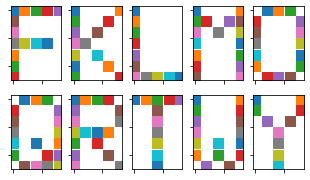

In [248]:
Network().show(X)

In [249]:
network = Network()
network.fit(X, Y)

In [250]:
network.predict(X)
network.predicted

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

[30 18  2  0  0  0  0  0  0  0]


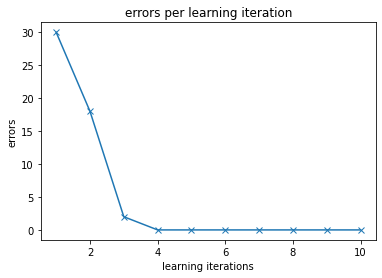

In [251]:
network.errors()

In [252]:
network.misclassified(Y)

misclassified examples: 0


In [253]:
damage5 = damage(X, 5)
damage15 = damage(X, 15)
damage40 = damage(X, 40)

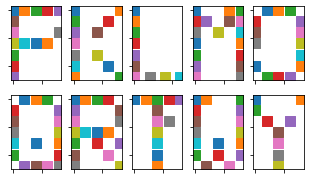

In [254]:
network.show(damage5)

In [255]:
network.predict(damage5)
network.predicted

[array([ 1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [256]:
network.misclassified(Y)

misclassified examples: 4


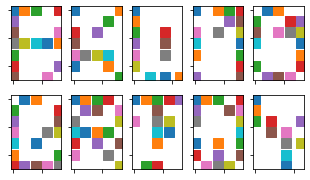

In [257]:
network.show(damage15)

In [258]:
network.predict(damage15)
network.predicted

[array([ 1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1,  1, -1, -1, -1, -1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1,  1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [259]:
network.misclassified(Y)

misclassified examples: 7


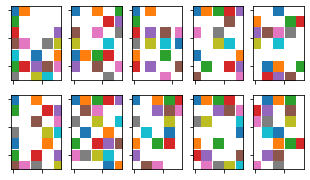

In [260]:
network.show(damage40)

In [261]:
network.predict(damage40)
network.predicted

[array([-1, -1, -1,  1, -1, -1,  1,  1, -1,  1]),
 array([-1,  1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1,  1, -1,  1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1,  1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1,  1,  1]),
 array([-1, -1,  1, -1, -1, -1,  1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1,  1]),
 array([-1,  1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1,  1])]

In [262]:
network.misclassified(Y)

misclassified examples: 24
